# Stair detection

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Function to display images inline

In [5]:
def imshow(image, figsize):
    plt.figure(figsize=figsize)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### Reading images and detecting edges

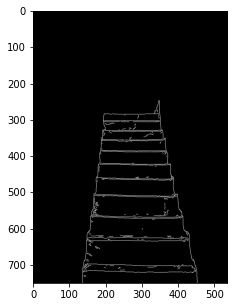

In [6]:
img = cv.imread("testImages/stair.png")
blur = cv.GaussianBlur(img, (3,3), 0)
grey = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
edge = cv.Canny(grey, 100, 150, apertureSize=3)

imshow(edge, (10,5))

### Fitting lines to edges

In [7]:
lines = cv.HoughLines(edge, 1, np.pi/180, 110)
print(lines.shape)
print(lines)

(27, 1, 2)
[[[ 6.3300000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 6.9500000e+02  1.5882496e+00]]

 [[ 4.2200000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 6.2500000e+02  1.5707964e+00]]

 [[ 4.1600000e+02  1.5882496e+00]]

 [[ 2.3700000e+02  1.3962634e-01]]

 [[ 5.7100000e+02  1.5707964e+00]]

 [[ 7.0900000e+02  1.6057029e+00]]

 [[ 5.6800000e+02  1.5707964e+00]]

 [[ 5.0100000e+02  1.6057029e+00]]

 [[ 2.4600000e+02  1.5707964e-01]]

 [[ 2.3100000e+02  1.2217305e-01]]

 [[ 4.5900000e+02  1.5882496e+00]]

 [[ 3.5000000e+02  1.5882496e+00]]

 [[ 4.5700000e+02  1.5882496e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 6.2800000e+02  1.5882496e+00]]

 [[ 4.6200000e+02  1.5707964e+00]]

 [[ 5.0600000e+02  1.5882496e+00]]

 [[ 6.9100000e+02  1.6057029e+00]]

 [[ 5.6200000e+02  1.5882496e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[-2.7200000e+02  2.9146998e+00]]

 [[ 7.0200000e+02  1.5707964e+00]]

 [[ 5.0300000e+02  1.5882496e+00]]]


### View lines

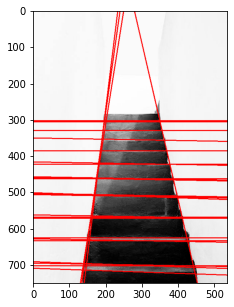

In [8]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)    


imshow(img, (10,5))

## Stair Angles

In [9]:
# Variable initialization
c0=0
c1=0
s0=0
s1=0

# Image refresh
img = cv.imread("testImages/stair.png")

0 angle @ Left =  0.13962634
1 angle @ Left =  0.15707964
2 angle @ Left =  0.12217305
0 angle @ Right =  2.9146998


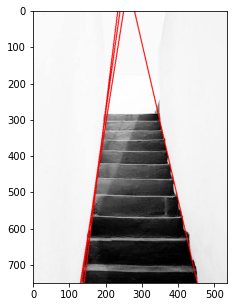

In [10]:
# Iterations
for line in lines:
    rho,theta = line[0]
    if 0.1<theta < 0.8 :
        print(c0,'angle @ Left = ',theta)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        s0=s0+theta
        c0=c0+1
        angle_L=s0/c0
    
    elif 2.4< theta< 3:
        print(c1,'angle @ Right = ',theta)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        s1=s1+theta
        c1=c1+1
        angle_R=s1/c1
      
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


### The values are in radians. 
### Keeping Y-axis as base, angle is measured anti-clockwise. 

In [11]:
print("Stair angle Left = ",angle_L)
print("Stair angle Right = ",angle_R)

Stair angle Left =  0.13962634156147638
Stair angle Right =  2.9146997928619385
